In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [116]:
# 1.1: Loading data
data =  np.load("/Users/ottosejrskildsantesson/Desktop/Methods 3/Github stuff/github_methods_3/github_methods_3/week_08/VScode/megmag_data.npy")

In [117]:

#1.1.1: How many repetitions, sensors and time samples are there?
data.shape
# Output: (682, 102, 251)
# 3 dimensions (axis) with length 682 (number of repetitions), 102 (number of sensors) and 251 (number of time samples).

(682, 102, 251)

In [118]:
# 1.1.2: make a vector from -200-800 with a 4 jump between each
times = np.arange(-200, 801, 4)

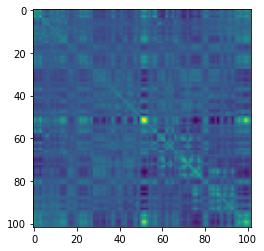

In [119]:
# 1.1.3: Making a sensor covariance matrix
cov_mat = [] # Creating an empty list

# calculating the dot product for all rows i using all data points in the dimensions
for i in range(len(data[:, 0, 0])):
    cov_mat.append(data[i,:,:] @ data[i,:,:].T) # @ = * (times) when dealing with matrices, append() appends an element to the end of the list, .T is command for transpose


# out of the loop the dot product of the the matrices for each i is summed and divided by n
cov_mat = sum(cov_mat)/len(data[:, 0, 0]) #divided by length of repetitions (682)

# plotting the covariance matrix
plt.imshow(cov_mat) # n equal number of targets in each folds
plt.show() # show the one just made


In [120]:

# 1.1.4 Make an average over the repetition dimension using np.mean - use the axis argument. (The resulting array should have two dimensions with time as the first and magnetic field as the second)
avr_rep = np.mean(data, axis = 0) # the axis = 0 makes the function average axis 1 and 2 over axis 0, and thus we end up with a data set only consisting of sensors and times (2D df).

# for inspection
avr_rep.shape




(102, 251)

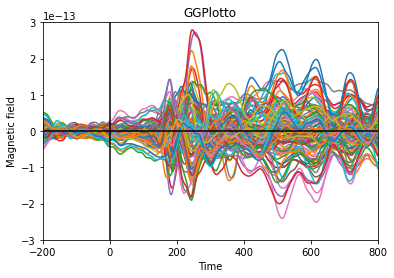

In [121]:

# 1.1.5: Plot the magnetic field (based on the average) as it evolves over time for each of the sensors (a line for each) (time on the x-axis and magnetic field on the y-axis). Add a horizontal line at y = 0 and a vertical line at x = 0 using plt.axvline and plt.axhline
plt.figure()
plt.plot(times, avr_rep.T)
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.axis([-200,800,-3e-13,3e-13])
plt.ylabel("Magnetic field")
plt.xlabel("Time")
plt.title("GGPlotto")
plt.show()


In [122]:
# 1.1.6: Find the maximal magnetic field in the average. Then use np.argmax and np.unravel_index to find the sensor that has the maximal magnetic field.
max = np.unravel_index(np.argmax(avr_rep, axis=None), avr_rep.shape)
max # sensor 73 at repetition 112


(73, 112)

In [123]:
data_copy = data
data_copy_subset = data_copy[]

SyntaxError: invalid syntax (2374859812.py, line 2)

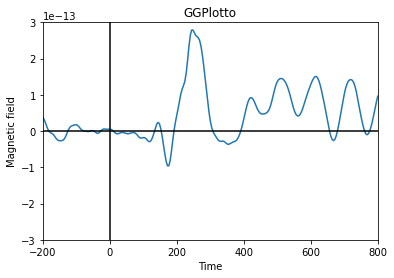

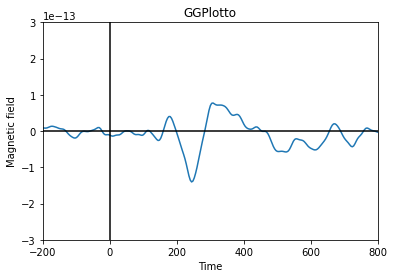

In [ ]:
# Just plotting the magnetic field of sensor with index 73 (Python being zero-indexed), and we see that the graph is the same, as the one with the highest peak in the previous plot

hepper = avr_rep[73,:]
hepper2 = avr_rep[0,:]

plt.figure()
plt.plot(times, hepper.T)
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.axis([-200,800,-3e-13,3e-13])
plt.ylabel("Magnetic field")
plt.xlabel("Time")
plt.title("GGPlotto")
plt.show()

plt.figure()
plt.plot(times, hepper2.T)
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.axis([-200,800,-3e-13,3e-13])
plt.ylabel("Magnetic field")
plt.xlabel("Time")
plt.title("GGPlotto")
plt.show()

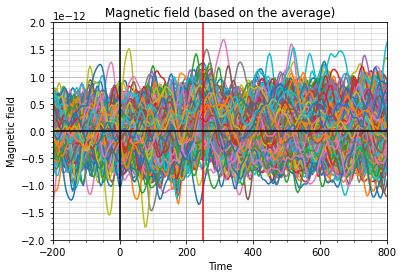

In [ ]:


# 1.1.7: Plot the magnetic field for each of the repetitions (a line for each) for the sensor that has the maximal magnetic field. Highlight the time point with the maximal magnetic field in the average (as found in 1.1.v) using plt.axvline

# Plot the magnetic field for each of the repetitions (a line for each) for the sensor that has the maximal magnetic field (sensor 73)
plt.figure()
plt.plot(times, data[:, 73, :].T)
plt.axvline((times[112]), color="red")  # Highlight the time point with the maximal magnetic field in the average
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.axis([-200,800,-2e-12,2e-12])
plt.grid(which ='major', alpha=1)
plt.grid(which='minor', alpha=0.4)
plt.minorticks_on()
plt.xlabel("Time")
plt.ylabel("Magnetic field")
plt.title("Magnetic field (based on the average)")
plt.show()


1.1.8: Describe in your own words how the response found in the average is represented in the single repetitions. But do make sure to use the concepts signal and noise and comment on any differences on the range of values on the y-axis

In [ ]:
# 1.2 Load new data
y = np.load("/Users/ottosejrskildsantesson/Desktop/Methods 3/Github stuff/github_methods_3/github_methods_3/week_08/VScode/pas_vector.npy")

In [ ]:
# 1.2.1
y.shape
# this data set has the same length as the number of repetitions from the earlier data set.

(682,)

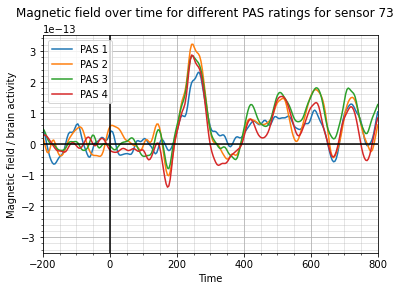

In [ ]:
# 1.2.2 Now make four averages (As in Exercise 1.1.3), one for each PAS rating, and plot the four time courses (one for each PAS rating) for the sensor found in Exercise 1.1.v

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# Making empty lists for each PAS rating
pas_1 = []
pas_2 = []
pas_3 = []
pas_4 = []

# Making a new data set with values only coming from sensor 73
sen73 = data[:, 73, :]

# Adding together the indexed numbers belonging to each PAS value (so I can later join the sen73 data with this index number)
for i in range(len(y)):
    if y[i] == 1:
        pas_1.append(i)
    if y[i] == 2:
        pas_2.append(i)
    if y[i] == 3:
        pas_3.append(i)
    if y[i] == 4:
        pas_4.append(i)



# calculating the average
avr_rep_pas1 = np.mean(sen73[pas_1], axis=0)
avr_rep_pas2 = np.mean(sen73[pas_2], axis=0)
avr_rep_pas3 = np.mean(sen73[pas_3], axis=0)
avr_rep_pas4 = np.mean(sen73[pas_4], axis=0)

# Plotting
# plt.figure()


plt.figure()
plt.plot(times, avr_rep_pas1, label="PAS 1")
plt.plot(times, avr_rep_pas2, label="PAS 2")
plt.plot(times, avr_rep_pas3, label="PAS 3")
plt.plot(times, avr_rep_pas4, label="PAS 4")

plt.axvline(color = "black")
plt.axhline(color = "black")
plt.axis([-200,800,-3.5e-13,3.5e-13])
plt.grid(which ='major', alpha=1)
plt.grid(which='minor', alpha=0.4)
plt.minorticks_on()

plt.xlabel("Time")
plt.ylabel("Magnetic field / brain activity")
# plt.title("Magnetic field over time for different PAS ratings for sensor 73", loc = 'right', pad = 1.0)
plt.suptitle("Magnetic field over time for different PAS ratings for sensor 73", fontsize= 12)
plt.legend(loc="upper left")
plt.show()

In [ ]:

# 1.2.3 Notice that there are two early peaks (measuring visual activity from the brain), one before 200 ms and one around 250 ms. Describe how the amplitudes of responses are related to the four PAS-scores. Does PAS 2 behave differently than expected?
"""
In general participants who rated PAS2 had a slightly higher activity in their visual cortex(?). If this effect is significant is hard to tell, but since the lines are averages across many repetitions one could imagine that the effect is significant.
Also when looking at the four lines, there seems to be a systematic pattern as to how the brain activity differs depending on which PAS rating the participants reported. If PAS4 was reported, the brain activity from 150-250ms was generally lower than 
if they rated pas 3, 2 or 1. The PAS2 ratings in particular are interesting, though, since the seem to deviate quite a lot from this pattern. On reason could be, that the participants could actually sense something but were a bit unsure and thus used 
extra cognitive resources to figure out what they saw. For PAS1 the target might have been too blurred for the participants even to worry about trying to figure out what was behind. 
"""


In [ ]:
################# EXERCISE 2 ####################

# 2.1.1: We’ll start with a binary problem - create a new array called data_1_2 that only contains PAS responses 1 and 2. Similarly, create a y_1_2 for the target vector

# Adding together the indexed numbers belonging to each PAS value.
y_1_2 = []

for i in range(len(y)):
    if y[i] == 1:
        y_1_2.append(i)
    if y[i] == 2:
        y_1_2.append(i)

data_1_2 = np.concatenate((data[pas_1], data[pas_2]), axis=0) # 3D
data_1_2.shape #
data_1_2.ndim # number of dimensions

3

In [ ]:
data_1_2.shape

(214, 102, 251)

In [ ]:

# 2.1.2: Scikit-learn expects our observations (data_1_2) to be in a 2d-array, which has samples (repetitions) on dimension 1 and features (predictor variables) on dimension 2. Our data_1_2 is a three-dimensional array. Our strategy will be to collapse our two last dimensions (sensors and time) into one dimension, while keeping the first dimension as it is (repetitions). Use np.reshape to create a variable X_1_2 that fulfils these criteria.
## Answer to Q: reshape(3,1) first number; the number of dimensions that I want.
## We cant really interpret the flattened data frame, but we need to flatten it in order for sklearn to be able to work with it.

# repetition as rows, and sensor and time as columns
X_1_2 = data_1_2.reshape(214,-1)

In [ ]:
# 2.1.3: Import the StandardScaler and scale X_1_2
from sklearn.preprocessing import StandardScaler # package to standardize values in df


sc = StandardScaler()
X_1_2_scaled = sc.fit_transform(X_1_2)


In [124]:
# 2.1.4: Do a standard LogisticRegression - can be imported from sklearn.linear_model - make sure there is no penalty applied
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(penalty='none') # no regularisation

logR.fit(X_1_2_scaled, y_1_2)

LogisticRegression(penalty='none')

In [126]:

# 2.1.5: Use the score method of LogisticRegression to find out how many labels were classified correctly. Are we overfitting? Besides the score, what would make you suspect that we are over fitting?

print(logR.score(X_1_2_scaled, y_1_2))

"""
The fact that we are not penalizing the model/
The fact that we're not splitting the data into train, validate and test subsets of the data (Stratified kfold cross validation)

"""

1.0


'\nThe fact that we are not penalizing the model\n'

In [128]:
# 2.1.6: Now apply the L1 penalty instead - how many of the coefficients (.coef_) are non-zero after this?
logR = LogisticRegression(C=10, penalty="l1", tol=0.01, solver='liblinear') # With regularization
logR.fit(X_1_2_scaled, y_1_2)
print(logR.score(X_1_2_scaled, y_1_2))

fit1 = logR.fit(X_1_2_scaled, y_1_2)

len(fit1.coef_ == 0)
len(fit1.coef_ != 0)

print(np.sum(fit1.coef_ != 0))

1.0
214
19604


In [129]:
print(len(fit1.coef_ == 0))
len(fit1.coef_ == 0)
len(fit1.coef_ != 0)


print(np.sum(fit1.coef_ != 0))
print(np.sum(fit1.coef_ == 0))
print(np.sum(fit1.coef_))



214
19604
5459224
21.489950992289053


In [138]:
print(fit1.coef_.shape[0]*fit1.coef_.shape[1])
fit1.coef_.shape
fit1size=214*25602
allcoeffit1 = 5459224+19604
pd.Index.identical(fit1size,allcoeffit1)
print(fit1size,allcoeffit1)




5478828


AttributeError: 'int' object has no attribute 'equals'

In [ ]:
# 2.1.7: Create a new reduced X that only includes the non-zero coefficients - show the covariance of the non-zero features (two covariance matrices can be made; X_reducedXT or XT Xreduced (you choose the right one)) . Plot the covariance of the features using plt.imshow. Compared to the plot from 1.1.iii, do we see less covariance?
X_reduced = fit1.coef_[fit1.coef_ != 0]

test = X_reduced.T

len(test)

